In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('stock_price_list',delimiter='\t')

#print the head
df.head()

,Date,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
0,2014-01-02,79.018570,0.0095,NaN,1.80,NaN,612.50,34.439999,1.36,0.009,...,15.860000,NaN,13.23,5.19,NaN,0.71,0.73,99.500000,0.0609,197.940002
1,2014-01-03,77.282860,0.0090,NaN,1.85,NaN,612.50,35.280003,1.49,0.009,...,15.670000,NaN,13.39,5.48,NaN,0.78,0.77,99.500000,0.0650,196.000000
2,2014-01-06,77.704285,0.0090,NaN,1.80,NaN,618.75,33.000000,1.46,0.009,...,15.880000,NaN,13.42,5.34,NaN,0.76,0.75,99.570000,0.0640,195.860001
3,2014-01-07,77.148575,0.0090,NaN,1.78,NaN,618.75,32.280003,1.50,0.009,...,16.139999,NaN,13.23,5.66,NaN,0.77,0.85,98.650002,0.0630,201.509995
4,2014-01-08,77.637146,0.0095,NaN,1.78,NaN,625.00,32.160000,1.60,0.009,...,16.360001,NaN,13.38,5.59,NaN,0.81,0.85,98.449997,0.0600,205.289993


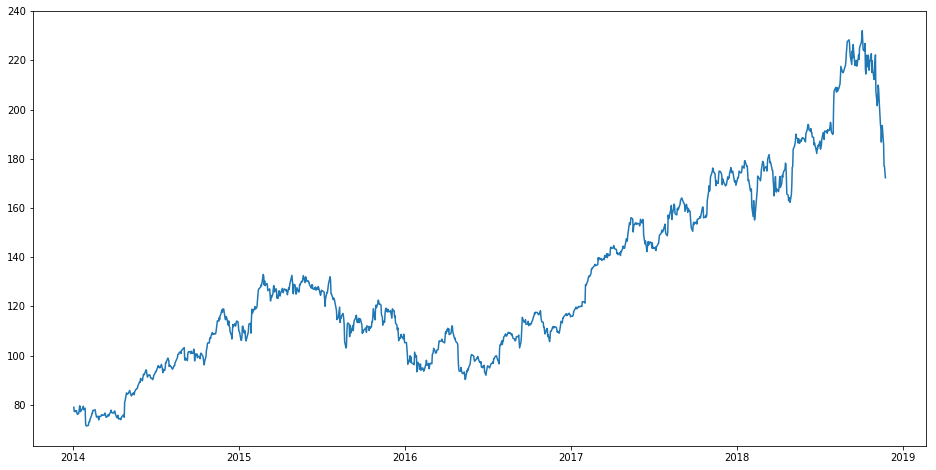

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['AAPL'], label='Close Price history')

In [13]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['AAPL'][i]

In [14]:
#splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [15]:
new_data.shape, train.shape, valid.shape

((1234, 2), (987, 2), (247, 2))

In [16]:
import datetime
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()



(Timestamp('2014-01-02 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-11-23 00:00:00'))

In [17]:
#make predictions
preds = []
for i in range(0,248):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [18]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

ValueError: operands could not be broadcast together with shapes (247,) (248,) 